In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os.path
import json

fluid = 'n-Butane'
jExt = '.json'
CPFluidDir = os.path.abspath(r'C:\Users\mthorade\Documents\git\CoolProp\dev\fluids')
#CPFluidDir = os.path.abspath(r'C:\Users\mthorade\Documents\Python\EnEffBIM-Framework\MoCGF\test')
# CPFluidDir = os.path.abspath(r'C:\Users\mthorade\Downloads')
fluidPath = os.path.join(CPFluidDir,fluid + jExt)
print(fluidPath)

jD = json.load(open(fluidPath, 'r'))
print(jD['INFO'])

C:\Users\mthorade\Documents\git\CoolProp\dev\fluids\n-Butane.json
{'2DPNG_URL': 'http://www.chemspider.com/ImagesHandler.ashx?id=7555', 'ALIASES': ['nButane', 'butane', 'BUTANE', 'N-BUTANE', 'R600'], 'CAS': '106-97-8', 'CHEMSPIDER_ID': 7555, 'ENVIRONMENTAL': {'ASHRAE34': 'A3', 'FH': 4, 'GWP100': 3.0, 'GWP20': -1.0, 'GWP500': -1.0, 'HH': 1, 'Name': 'n-Butane', 'ODP': -1.0, 'PH': 0}, 'FORMULA': 'C_{4}H_{10}', 'INCHI_KEY': 'IJDNQMDRQITEOD-UHFFFAOYAE', 'INCHI_STRING': 'InChI=1/C4H10/c1-3-4-2/h3-4H2,1-2H3', 'NAME': 'n-Butane', 'REFPROP_NAME': 'BUTANE', 'SMILES': 'CCCC'}


In [2]:
# Testing ancillary p=p(T)

nPoints = 10000

pS_r = jD['ANCILLARIES']['pS']['reducing_value']
TS_r = jD['ANCILLARIES']['pS']['T_r']

TSmin = jD['ANCILLARIES']['pS']['Tmin']
TSmax = jD['ANCILLARIES']['pS']['Tmax']

pSn = jD['ANCILLARIES']['pS']['n']
pSt = jD['ANCILLARIES']['pS']['t']

TS_sat = np.linspace(TSmin, TSmax, num=nPoints)

tauS = TS_r/TS_sat
ThetaS = 1-TS_sat/TS_r

pS_sat = np.empty(nPoints)

for idx in range(0,nPoints):
  pS_sat[idx] = pS_r*np.exp(tauS[idx]*sum(pSn*ThetaS[idx]**pSt))

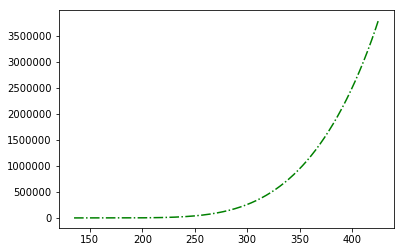

In [3]:
plt.plot(TS_sat, pS_sat, color='green', linestyle='-.')
plt.show()